### Introduction
Consider to solve 1D wave equation with the piezoelectric excitation in the domain of $(0 \leq x \leq L)\times(0 \leq t \leq T)$ with various material propeties:
$$ \rho(x) \frac{\partial {^2 u(x,t)}}{\partial{t^2}} = \frac{\partial}{\partial x} \left[E(x) \frac{\partial {u(x,t)}}{\partial{x}} \right] - e_{33}(x) \frac{\partial \mathscr{E}(x,t)}{\partial x} $$

where $e_{33}(x)=0$ if $x\notin[x_f, x_f+h_p]$, and electric field $\mathscr{E}(x,t) = V_p(t)/(\epsilon_{33} h_p)$ if $x\in[x_f, x_f+h_p]$, else $0$

where $V_p(t)$ is the voltage applied across the piezoelectric layer and $h_p$ is the piezoelectric layer thickness.

Free boundary condition at $x=0$:
$$\frac{\partial }{\partial x} u(x=0, t) = 0$$
Absorbing boundary condition at at $x=L$: 
$$c\frac{\partial}{\partial x}u(x=L, t) + \frac{\partial}{\partial t}u(x=L, t) = 0$$
Initial conditions at $t=0$:
$$u(x, t=0) = 0, \frac{\partial{u(x, t=0)}}{\partial{t}} = 0$$

Now we apply Fourier Transfrom to each side of frequency in time-domain and annotate $\tilde u(x,\omega)$ to represent the Fourier Transform coefficient of $u(x,t)$ at the frequency of $\omega$. The governing equation becomes:
$$\rho(x) (i\omega)^2 \tilde{u}(x,\omega) = \frac{\partial}{\partial x} \left[E(x) \frac{\partial {\tilde{u}(x,\omega)}}{\partial{x}} \right] - e_{33}(x) \frac{\partial \tilde{\mathscr{E}}(x,\omega)}{\partial x}$$

Now descretize space with step of $\Delta x$. Then the second-order derivatives can be replaced by central differences:
$$\frac{\partial ^2}{\partial x^2}\tilde{u}(x_m,\omega) \approx \frac{\tilde{u}_{m-1}(\omega) - 2\tilde{u}_m(\omega) + \tilde{u}_{m+1}(\omega)}{\Delta x^2}$$
$$\frac{\partial}{\partial x}\tilde{u}(x_m,\omega) \approx \frac{-\tilde{u}_{m-1} + \tilde{u}_{m+1}}{2\Delta x}$$
where $m=1,2,...,M-1, n=2,...,N$. Note that:
$$ \frac{\partial}{\partial x} \left[E(x) \frac{\partial {\tilde{u}(x,\omega)}}{\partial{x}} \right] = E(x)\frac{\partial ^2 \tilde{u}(x,\omega)}{\partial x^2} + \frac{\partial E(x)}{\partial x} \frac{\partial {\tilde{u}(x,\omega)}}{\partial{x}}$$
The wave equation becomes:
$$-\omega^2 \rho_m \tilde{u}_m(\omega) = E_m\frac{\tilde{u}_{m-1}(\omega) - 2\tilde{u}_m(\omega) + \tilde{u}_{m+1}(\omega)}{\Delta x^2} + \frac{-E_{m-1} + E_{m+1}}{2\Delta x} \frac{-\tilde{u}_{m-1}(\omega) + \tilde{u}_{m+1}(\omega)}{2\Delta x} - e_{33}(x) \frac{-\tilde{\mathscr{E}}_{m-1}(\omega) + \tilde{\mathscr{E}}_{m+1}(\omega)}{2\Delta x}$$

Which produces with $c_m=\sqrt{E_m/\rho_m}, c_{m-1}c_m \approx \frac{\sqrt{E_{m-1} \cdot E_{m}}}{\sqrt{\rho_{m-1} \cdot \rho_{m}}} \approx E_{m-1}/\rho_m, c_{m}c_{m+1} \approx \frac{\sqrt{E_{m} \cdot E_{m+1}}}{\sqrt{\rho_{m} \cdot \rho_{m+1}}} \approx E_{m+1}/\rho_m,\nu_m=\frac{c_m/\Delta x}{\omega },  e_{33} = Ed_{33}$:

$$\left(\nu^2_m - \frac{-\nu_{m-1}\nu_m + \nu_{m}\nu_{m+1}}{4}\right) \tilde{u}_{m-1}(\omega) + (1 - 2\nu_m^2)\tilde{u}_m(\omega) + \left(\nu^2_m + \frac{-\nu_{m-1}\nu_m + \nu_{m}\nu_{m+1}}{4}\right) \tilde{u}_{m+1}(\omega) = d_{33} \nu^2_{m} \frac{[-\tilde{\mathscr{E}}_{m-1}(\omega) + \tilde{\mathscr{E}}_{m+1}(\omega)]\Delta x}{2}$$

Free boundary condition at $x=0$: $\tilde{u}_{0}(\omega)=\tilde{u}_1(\omega)$; <br/>
Absorbing boundary condition at $x=L$: $(\nu_M + i) \tilde{u}_M(\omega) - \nu_M \tilde{u}_{M-1} = 0 $; <br/>

#### initial conditions
With the abve equations at $\omega = n\Delta \omega$ (discretizing frequency with $\Delta \omega$), the solution is $u(x_m,t) = \sum_{n=-N/2}^{+N/2} \tilde{u}_m(n\Delta \omega) e^{(in\Delta \omega t)}$ <br/>
From the initial condition at $t=0$, we can derive: <br/>
$$ \sum_{n=-N/2}^{+N} \tilde{u}_m(n\Delta \omega) = 0 $$
$$ \sum_{n=-N/2}^{+N} in\tilde{u}_m(n\Delta \omega) = 0 $$

If $\mathscr{E}(x,t=0)=0, \partial_t \mathscr{E}(x,t=0)=0$ are satisfied (which is typically true), then we don't have to particularlly worry about the initial conditions.

For speeding up computation, we want to express the above equations in Matrix formula:
$$\mathbf{Ku}^{n} = \mathbf{D}\mathbf{F}^{n}$$
where $n>0$, $\mathbf{\tilde{u}}^{n}=[\tilde{u}_0, \tilde{u}_1, \tilde{u}_2, \cdots, \tilde{u}_M]^T(n\Delta \omega)$, $\mathbf{F}^{n}=[0,0,\cdots,0,p_1(n\Delta \omega),0,\cdots,0,p_2(n\Delta \omega),0,\cdots,0]$, $\mathbf{D}=diag[0,1,1,\cdots,1,0]$, and
$$ \mathbf{K} = \begin{bmatrix}
1   &   -1   & 0 &  & &\\
\nu^2_1-\frac{-\nu_0+\nu_2}{4}\nu_1 & 1-2\nu^2_1 & \nu^2_1+\frac{-\nu_0+\nu_2}{4}\nu_1 &  & &\\
& \nu^2_2-\frac{-\nu_1+\nu_3}{4}\nu_2   & 1-2\nu^2_2 & \nu^2_2+\frac{-\nu_1+\nu_3}{4}\nu_2 &  &\\
& & \ddots & \ddots & \ddots & \\
& & & \nu^2_{M-1}-\frac{-\nu_{M-2}+\nu_M}{4}\nu_{M-1} & 1-2\nu^2_{M-1} & \nu^2_{M-1}+\frac{-\nu_{M-2}+\nu_M}{4}\nu_{M-1} \\
& & & 0  & -\nu_M & \nu_M+i
\end{bmatrix}
$$

$$p_1(n\Delta \omega) = d_{33} \nu^2_{m_1} \frac{\tilde{V}(n\Delta \omega)}{\epsilon_{33} h_p} \frac{\Delta x}{2}, m_1 = \frac{x_f}{\Delta x}$$
$$p_2(n\Delta \omega) = -d_{33} \nu^2_{m_2} \frac{\tilde{V}(n\Delta \omega)}{\epsilon_{33} h_p} \frac{\Delta x}{2}, m_2 = m_1 + \frac{h_p}{\Delta x}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 500 # um
dx = 1 # um
Nx = int(L/dx) + 1
xgrid = np.arange(0, Nx)*dx

cs = [1000, 2000, 3000] # m/s
xs = [100, 110, L] #um
xs0 = [0] + xs[:-1]
cgrid = np.zeros_like(xgrid)
for c,x,x0 in zip(cs,xs,xs0):
    cgrid = np.where((xgrid<=x) & (xgrid>x0), c, cgrid)
cgrid[0] = cs[0]

T = 5 # us
dt = 1/50 # us
Nt = int(T/dt) + 1
fs = 1/dt
ws = fs*2*np.pi
dw = ws/(Nt-1)
tgrid = np.arange(0, Nt)*dt

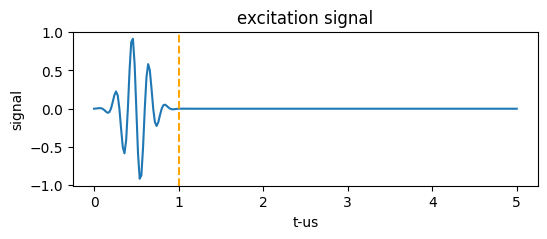

In [3]:
# plot excitation signal
t0 = 1 # us
n0 = int(t0/dt)
xf = xs[1] # um
xr = xs[0] # ums
hf = xf - xr
mf = int(xf/dx)
mr = int(xr/dx)


freq = 5 # MHz
def f(t):
    return np.exp(-(t-t0/2)**2/(0.2*t0)**2)*np.sin(2*np.pi*freq*t)

exc_sig = f(tgrid)
fig = plt.figure(figsize=[6,2])
plt.plot(tgrid, exc_sig)
plt.axvline(x=t0, color='orange', linestyle='--')
plt.xlabel('t-us')
plt.ylabel('signal')
plt.title('excitation signal')
plt.show()

In [4]:
# construct K matrix
dd = np.ones((Nx,1))
dd[0] = 0
dd[-1] = 0

def get_K(n):
    omega = n*dw
    nu = cgrid/(omega*dx)
    
    v2 = 1-2*nu**2 + 0j
    v2[0] = 0
    v2[-1] = 0

    v1 = nu[1:]*nu[1:] + 0j
    v1[:-1] -= 0.25*(-nu[:-2]+nu[2:])*nu[1:-1]
    v1[-1] = 0

    v3 = nu[:-1]*nu[:-1] + 0j
    v3[1:] += 0.25*(-nu[:-2]+nu[2:])*nu[1:-1]
    v3[0] = 0

    K = np.diag(v2) + np.diag(v1,k=-1) + np.diag(v3,k=1)
    K[0,0] = 1
    K[0,1] = -1
    K[-1,-2] = -nu[-1]
    K[-1,-1] = nu[-1] + 1.j
    
    return K

d33 = 1
e33 = 1

from numpy import fft

exc_sig_fft = fft.fft(exc_sig)
fn = fft.fftfreq(Nt,d=1/Nt).astype(int)
def get_F(n):
    omega = n*dw
    nu = cgrid/(omega*dx)
    
    ff = np.zeros_like(dd)*1j
    ff[mr] = d33*dx/(2*hf)*exc_sig_fft[n]*nu[mr]**2
    ff[mf] = -d33*dx/(2*hf)*exc_sig_fft[n]*nu[mf]**2
    return ff

In [5]:
from tqdm import tqdm
U_complex = []
for n in fn: # this can be parallel
    if n == 0:
        u_n = np.zeros((Nx,1))*1j
    else:
        K = get_K(n)
        F = get_F(n)
        u_n = np.linalg.solve(K, F)
    U_complex.append(u_n)
    
U_complex = np.concatenate(U_complex, axis=1)

In [6]:
import time

ti = time.time()
U = []
for n in range(Nx):
    u_n = fft.ifft(U_complex[n, :])
    U.append(u_n.real.reshape(1,-1))

U = np.concatenate(U, axis=0)
tf = time.time()
print(tf-ti, 's')

0.02091217041015625 s


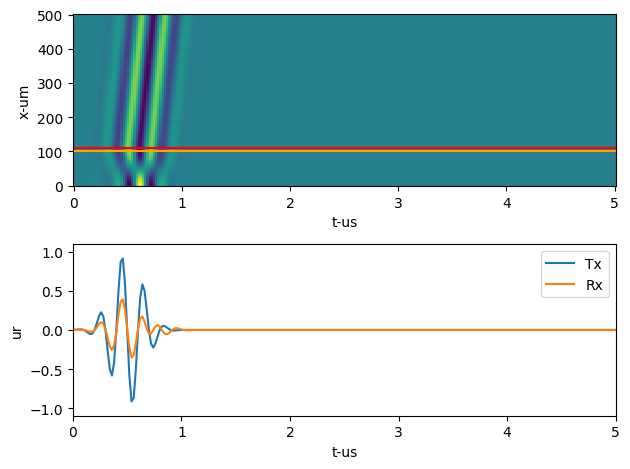

In [7]:
# visualize results
fig, ax = plt.subplots(2)
xx,tt = np.meshgrid(xgrid, tgrid, indexing='ij')
ax[0].pcolormesh(tt,xx,U)
ax[0].axhline(y=xf, color='r', linestyle='-')
ax[0].axhline(y=xr, color='orange', linestyle='-')
ax[0].set_xlabel('t-us')
ax[0].set_ylabel('x-um')

ur = (U[mf,:] - U[mr,:])*e33
ax[1].plot(tgrid, exc_sig, label='Tx')
ax[1].plot(tgrid, ur, label='Rx')
ax[1].set_xlabel('t-us')
ax[1].set_ylabel('ur')
ax[1].margins(x=0.0, y=0.1)
ax[1].legend()
fig.tight_layout()